In [1]:
import pandas as pd
import time
import datetime
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from env.env_fx_single_pair_window import tgym
file ="./data/split/GBPUSD/weekly/GBPUSD_2017_0.csv"
df = pd.read_csv(file)
t = tgym(df)

c:\github\tgym\.venv\lib\site-packages\setuptools\distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(


initial done:
observation_list:['Open', 'High', 'Low', 'Close', 'minute', 'hour', 'day', 'macd', 'boll_ub', 'boll_lb', 'rsi_30', 'dx_30', 'close_30_sma', 'close_60_sma']
 asset:GBPUSD
 time serial: 2017-01-02 01:00:00 -> 2017-01-06 23:55:00 length: 1428


In [ ]:
t._o, t._c, t._h, t._l,t._t,t._day = t.df.iloc[t.current_step][["Open","Close","High","Low","_time","_day"]]
print(t._o, t._c, t._h, t._l,t._t,t._day)

In [ ]:
t.reward_box

In [ ]:
_point = t.cf.symbol(t.asset,"point")
t._c = _df["Close"][0]
_hl_forward_w = _df[["High","Low"]]
buy_sl, buy_pt, sell_sl, sell_pt = False, False, False, False
for _, row in _hl_forward_w.iterrows():
    if (row.Low - t._c) * _point <= t._stop_loss and not buy_pt:
        print((row.Low - t._c) * _point, t._stop_loss)
        buy_sl = True
    elif (row.High - t._c) * _point > t._profit_taken and not buy_sl:
        print((row.High - t._c) * _point , t._profit_taken)
        buy_pt = True
        
    if (t._c - row.High ) * _point <= t._stop_loss and not sell_pt:
        print((t._c - row.High ) * _point , t._stop_loss)
        sell_sl = True
    elif (t._c - row.Low) * _point > t._profit_taken and not sell_sl:
        print((t._c - row.Low) * _point , t._profit_taken)
        sell_pt = True
buy_sl, buy_pt, sell_sl, sell_pt


In [7]:
t.reset()
model = PPO("MlpPolicy",t,verbose = 1, tensorboard_log="/github/neofinrl/data/log")
model.learn(total_timesteps=200000,tb_log_name="PPO")


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to /github/neofinrl/data/log\PPO_48
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.38e+03 |
|    ep_rew_mean     | -270     |
| time/              |          |
|    fps             | 144      |
|    iterations      | 1        |
|    time_elapsed    | 14       |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.38e+03    |
|    ep_rew_mean          | -270        |
| time/                   |             |
|    fps                  | 169         |
|    iterations           | 2           |
|    time_elapsed         | 24          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009433504 |
|    clip_fraction        | 0.0353      |
|    clip_range   

In [4]:
import pandas as pd
import time
import datetime
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from neo_finrl.env_fx_trading.env_fx_single_pair_window import tgym
model_name = './data/models/GBPUSD-week-20220225183902.zip'
total_timesteps = 150000    
start_time = time.time()
print(f'start training: {start_time}')
for i in range(10,50):
    file =f"./data/split/GBPUSD/weekly/GBPUSD_2017_{i}.csv"
    df = pd.read_csv(file)
    t = tgym(df)
    if os.path.exists(model_name):
        model = PPO.load(model_name, env=t,verbose = 0, tensorboard_log="/github/neofinrl/data/log")
        print(f'retaining model: {model_name}')
    else:
        model = PPO("MlpPolicy", env=t,verbose = 0, tensorboard_log="/github/neofinrl/data/log")
        print(f'create new model: {model_name}')            
    s = datetime.datetime.now()        
    model.learn(total_timesteps=total_timesteps)
    model_name_session = "./data/models/GBPUSD-week-" + s.strftime('%Y%m%d%H%M%S')
    model.save(model_name_session)
    print(f'complete iteration:{i} at {s}')
model.save(model_name)

start training: 1645777369.7291212
initial done:
observation_list:['Open', 'High', 'Low', 'Close', 'minute', 'hour', 'day', 'macd', 'boll_ub', 'boll_lb', 'rsi_30', 'dx_30', 'close_30_sma', 'close_60_sma']
 asset:GBPUSD
 time serial: 2017-03-13 00:00:00 -> 2017-03-17 22:55:00 length: 1428
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
retaining model: ./data/models/GBPUSD-week-20220225183902.zip


AttributeError: 'tgym' object has no attribute '_day'

In [19]:
import os
def train(env, agent, model_name,**kwargs):
    learning_rate = kwargs.get('learning_rate', 3e-4)
    batch_size = kwargs.get('batch_size', 32)
    gamma = kwargs.get('gamma', 0.99)
    seed = kwargs.get('seed', 1)
    total_timesteps = kwargs.get('total_timesteps', 2e5)
    net_dimension = kwargs.get('net_dimension', 2**9)

    # env_instance = map(env, [pd.read_csv(f) for f in files])
    if agent == 'ppo':
        from stable_baselines3 import PPO
        from stable_baselines3.common.vec_env import SubprocVecEnv, DummyVecEnv
        ppo_kwargs = {"learning_rate":learning_rate,
                        # "n_steps":2048, 
                        "batch_size":batch_size, 
                        # "ent_coef":0.0, 
                        "gamma":gamma, 
                        # "seed":seed, 
                        "verbose":0, 
                        # "epsilon":0.5,
                        "tensorboard_log":"./data/log/"}

        # env_train = [x.get_sb_env for x in env_instance ]
        # vector_env = [lambda:env for _ in range(4)]
        # env_train = DummyVecEnv(vector_env)
        start_time = time.time()
        s = datetime.datetime.now()
        print(f'Training start: {s}')
        if os.path.exists(model_name):
            model = PPO.load(model_name, env=env, **ppo_kwargs)
            print(f'retaining model: {model_name}')
            model.learn(total_timesteps=total_timesteps)
            model.save(model_name)
        else:
            model = PPO("MlpPolicy", env=env, **ppo_kwargs)
            model.learn(total_timesteps=total_timesteps)
            model.save(model_name)

        print('Training finished!')
        model_name_session = "./data/models/GBPUSD-week-" + s.strftime('%Y%m%d%H%M%S')
        model.save(model_name_session)
        print(f'Trained model saved in {model_name_session}')
        print(f"trainning time: {(time.time() - start_time)}")

    else:
        raise ValueError('DRL library input is NOT supported. Please check.')

plotting...


c:\github\NeoFinRL\.venv\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
c:\github\NeoFinRL\.venv\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn

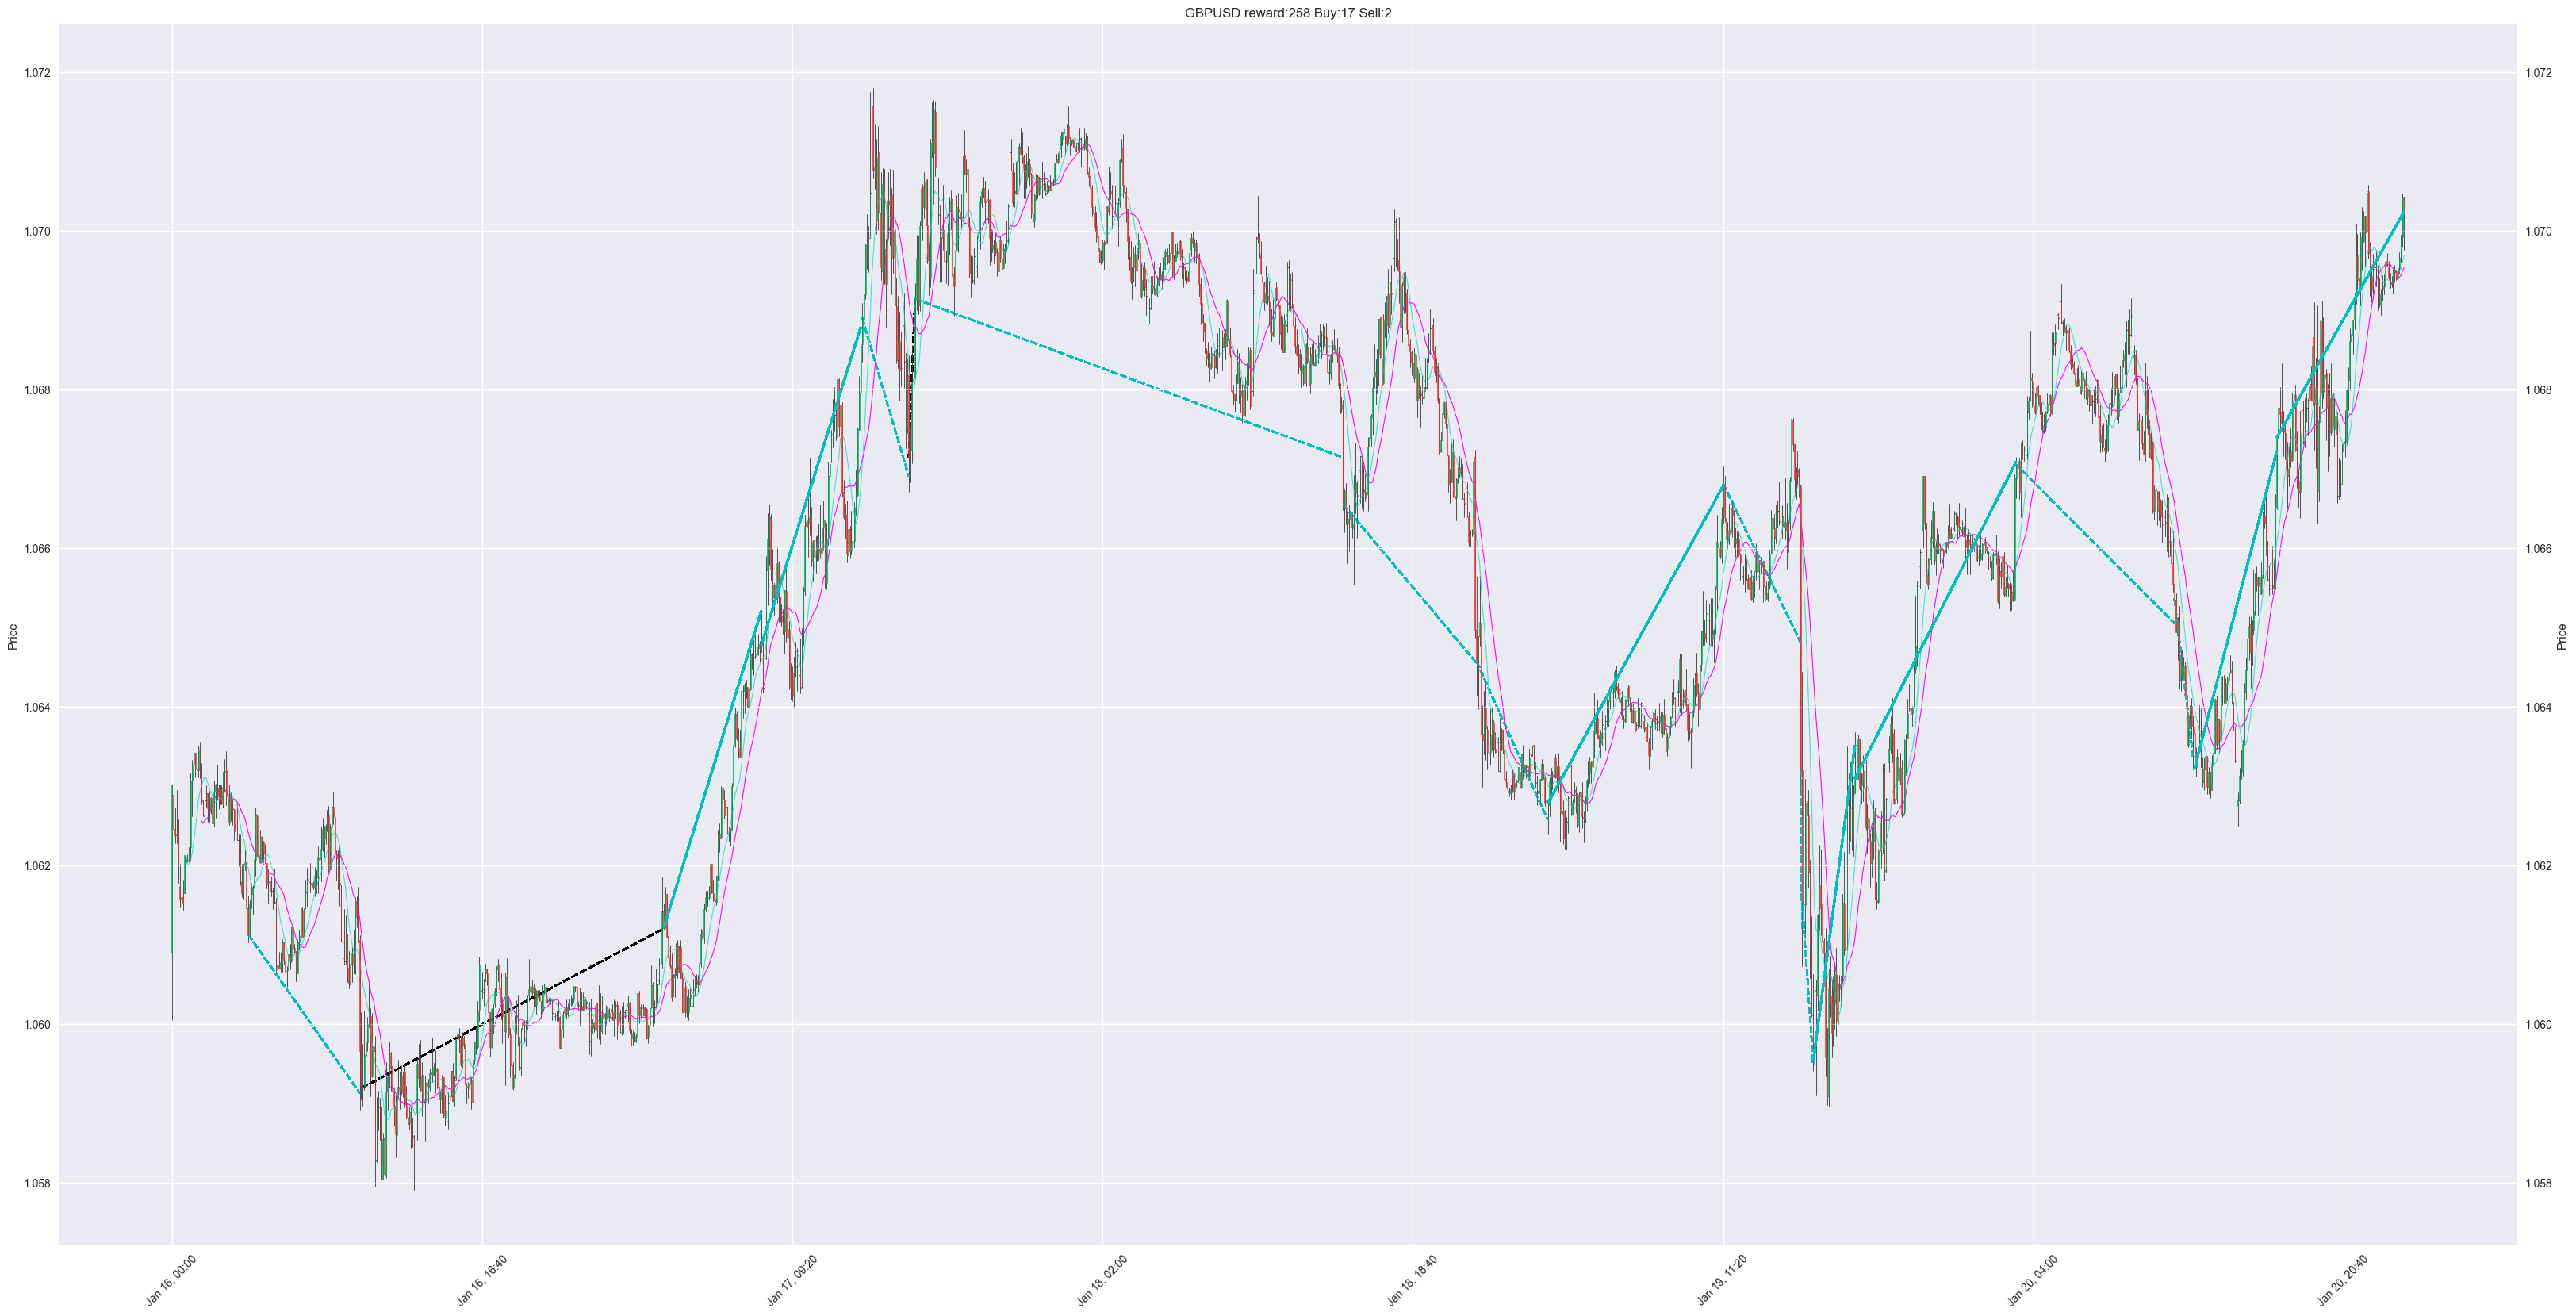

In [22]:
obs = t.reset()
done = False
rewards = 0
t.training = False
while not done:
    action, _states = model.predict(obs)
    obs, r, done, info = t.step(action)
    rewards += r
    # print(action, rewards)
# print(rewards, t.transaction_history)
t.render(mode='graph')


In [ ]:


# if model: del model # remove to demonstrate saving and loading
model_name='./data/models/GBPUSD-week'
model = PPO.load(model_name)

start_time = time.time()
obs = t.reset()
t.current_step=0
done = False
while not done:
    action, _states = model.predict(obs)
    obs, rewards, done, info = t.step(action)
    print(action, rewards)
    t.render(mode='graph')
print(f"--- running time: {(time.time() - start_time)}---")

In [ ]:
def train(env, agent, model_name,parallel, if_vix = True,**kwargs):
    learning_rate = kwargs.get('learning_rate', 3e-4)
    batch_size = kwargs.get('batch_size', 1024 )
    gamma = kwargs.get('gamma', 0.99)
    seed = kwargs.get('seed', 1)
    total_timesteps = kwargs.get('total_timesteps', 1e5)
    net_dimension = kwargs.get('net_dimension', 2**9)
    cwd = kwargs.get('cwd','./'+str(agent))

    # env_instance = map(env, [pd.read_csv(f) for f in files])
    if agent == 'ppo':
        from stable_baselines3 import PPO
        from stable_baselines3.common.vec_env import SubprocVecEnv, DummyVecEnv
        ppo_kwargs = {"learning_rate":learning_rate,
                        "n_steps":2048, 
                        "batch_size":batch_size, 
                        "ent_coef":0.0, 
                        "gamma":gamma, 
                        "seed":seed, 
                        "verbose":0, 
                        "epsilon":0.5,
                        "tensorboard_log":"./data/tensorboard/"}

        # env_train = [x.get_sb_env for x in env_instance ]
        vector_env = [lambda:env for _ in range(4)]
        env_train = DummyVecEnv(vector_env)
        start_time = time.time()
        s = datetime.datetime.now()
        print(f'Training start: {s}')
        if os.path.exists(model_name):
            model = PPO.load(model_name, env=env_train, **ppo_kwargs)
            print(f'retaining model: {model_name}')
            model.learn(total_timesteps=total_timesteps)
            model.save(model_name)
        else:
            model = PPO("MlpPolicy", env=env_train, **ppo_kwargs)
            model.learn(total_timesteps=total_timesteps)
            model.save(model_name)

        print('Training finished!')
        model_name_session = "./data/models/GBPUSD-week-" + s.strftime('%Y%m%d%H%M%S')
        model.save(model_name_session)
        print(f'Trained model saved in {model_name_session}')
        print(f"trainning time: {(time.time() - start_time)}")

    else:
        raise ValueError('DRL library input is NOT supported. Please check.')

In [ ]:
m = ''
train(env=tgym,agent="ppo",model_name = m, parallel =4)    